In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
receptive_fields = {
    'VGG13': './receptive_field/VGG13.csv',
    'VGG13_D2': './receptive_field/VGG13_D2.csv',
    'VGG13_D4': './receptive_field/VGG13_D4.csv',
}

resolutions = {
    'Cifar10': 32,
    'Cifar10_132': 132,
    'Cifar10_140': 140,
    'Cifar10_150': 150,
    'Cifar10_75': 75,
    'Cifar10_38': 38,
    'Cifar10_300': 300,
    'Cifar10_600': 600,
}

In [3]:
from typing import Tuple

def extract_layer_stat(df, epoch=19, primary_metric=None, stat='saturation') -> Tuple[pd.DataFrame, float]:
    """
    Extracts a specific statistic for a single epoch from a result dataframe as produced by the CSV-writer
    :param df: The dataframe produced by a CSVWriter
    :param epoch: Epoch to filter by
    :param primary_metric: Primary metric for performance evaluation (optional)
    :param stat: The statistic to match. Must be a substring matching all columns belonging to stat statistic like "saturation"
    :return: A dataframe with a single row, corresponding to the epoch containing only the columns that contain the substring
    described in the stat-parameter in their name. Second return value is the primary metric value
    """
    cols = list(df.columns)
    train_cols = [col for col in cols if
                  'train' in col and not 'accuracy' in col and stat in col and not 'classifier' in col]
    if not np.any(epoch == df.index.values):
        raise ValueError(f'Epoch {epoch} could not be recoreded, dataframe has only the following indices: {df.index.values}')
    epoch_df = df[df.index.values == epoch]
    pm = None if primary_metric is None else epoch_df[primary_metric].values[0]
    epoch_df = epoch_df[train_cols]
    return epoch_df, pm

def find_border_layer(receptive_fields_in_layer, dataset):
    size = resolutions[dataset]
    k = receptive_fields_in_layer > size
    x = np.argmax(k)
    print(k)
    return len(k)-1 if all(k == False) else x

def plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id):
    receptive_field: str = f'./receptive_field/{model}_{dataset}.csv'
    file: str = f'./logs/{model}/{dataset}/{model}_bs{batch_size}_e{epochs}_dspl{downsampling}_t{thresh}_id{run_id}.csv'
    rf = pd.read_csv(receptive_field, sep=';', index_col=0)
    mdl = pd.read_csv(file, sep=';', index_col=0)
    df, pm = extract_layer_stat(mdl, epoch=29, primary_metric='test_accuracy', stat='saturation')
    probe_accs = pd.read_csv(f'results_{model}_{dataset}.csv', sep=';', index_col=0)
    probe_accs.head()

    feature_maps = rf['map_size'].values
    print(feature_maps)

    fig, ax1 = plt.subplots()

    receptive_field_evolution = rf['receptive_field'].values
    indices = list(range(len(receptive_field_evolution)))

    ax1.plot(indices, receptive_field_evolution, label='Receptive Field', color='red')
    ax1.scatter(indices, receptive_field_evolution, color='red')
    
   # ax1.plot(indices, feature_maps, label='Feature Map Size', color='blue')
   # ax1.scatter(indices, feature_maps, color='blue')
    
    ax2 = ax1.twinx() 

    ax2.plot(indices, df.values[0,:], label='Saturation')
    ax2.scatter(indices, df.values[0,:])

    ax2.plot(indices, probe_accs['eval_acc'].values[:-2], label='Probe Accuracy')
    ax2.scatter(indices, probe_accs['eval_acc'].values[:-2])
    
    ax2.vlines(find_border_layer(receptive_field_evolution, dataset), 0, 1)

    plt.grid()
    fig.legend()

    plt.title(f"Test Accuracy: {round(100*pm, 2)}%")

[150 150  75  75  37  37  18  18   9   9]
[False False False False False False False False False False]


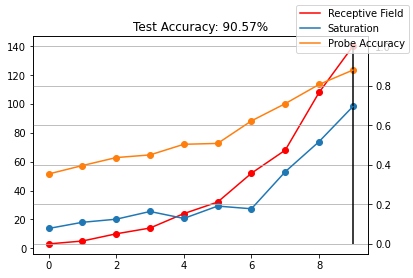

In [4]:
model = 'VGG13'
dataset = 'Cifar10_150'
batch_size = 16
epochs = 30
downsampling = 'None'
thresh = 10000
run_id = 'RF1'

plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id)

[75 75 37 37 18 18  9  9  4  4]
[False False False False False False False False  True  True]


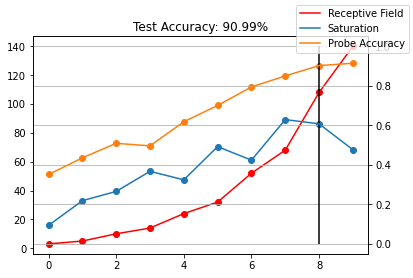

In [5]:
model = 'VGG13'
dataset = 'Cifar10_75'
batch_size = 16
epochs = 30
downsampling = 'None'
thresh = 10000
run_id = 'RF1'

plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id)

[38 38 19 19  9  9  4  4  2  2]
[False False False False False False  True  True  True  True]


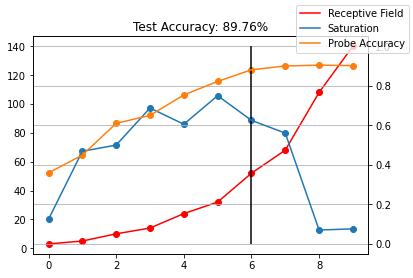

In [6]:
model = 'VGG13'
dataset = 'Cifar10_38'
batch_size = 16
epochs = 30
downsampling = 'None'
thresh = 10000
run_id = 'RF1'

plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id)

[142 144  74  76  40  42  23  25  14  16]
[False False False False False False False False  True  True]


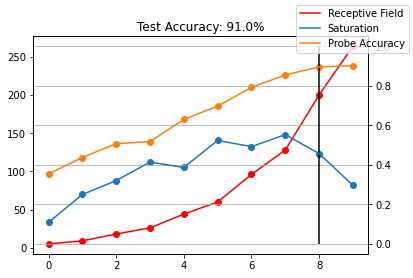

In [7]:
model = 'VGG13_D2'
dataset = 'Cifar10_140'
batch_size = 16
epochs = 30
downsampling = 'None'
thresh = 10000
run_id = 'RF1'

plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id)

[138 144  78  84  48  54  33  39  25  31]
[False False False False False False  True  True  True  True]


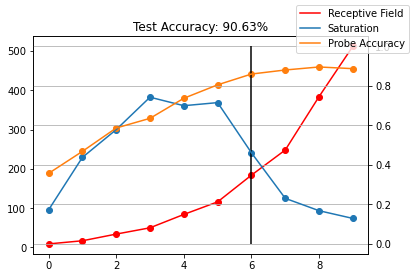

In [8]:
model = 'VGG13_D4'
dataset = 'Cifar10_132'
batch_size = 16
epochs = 30
downsampling = 'None'
thresh = 10000
run_id = 'RF1'

plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id)

[32 32 32 32 32 32 16  8  4  2]
[False False False False False False False False  True  True]


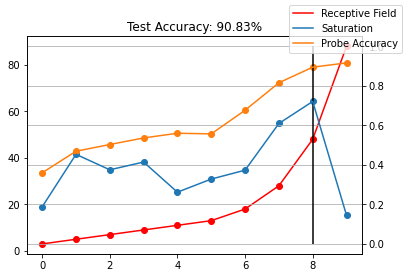

In [9]:
model = 'VGG13_Early'
dataset = 'Cifar10'
batch_size = 32
epochs = 30
downsampling = 'None'
thresh = 10000
run_id = 'RF2'

plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id)

In [12]:
model = 'VGG13_Thin'
dataset = 'Cifar10_88'
batch_size = 32
epochs = 30
downsampling = 'None'
thresh = 10000
run_id = 'RF2'

plot_receptive_field(model, dataset, batch_size, epochs, downsampling, thresh, run_id)

FileNotFoundError: [Errno 2] File results_VGG13_Thin_Cifar10_88.csv does not exist: 'results_VGG13_Thin_Cifar10_88.csv'